In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from utils import transform_into_bins

In [2]:
df = pd.read_csv('clean_data/master.csv')

df.head()

numero_departement          nom_commune  code_region   nom_region  codgeo  \
0                   1              Ambléon           82  Rhône-Alpes    1006   
1                   1             Ambronay           82  Rhône-Alpes    1007   
2                   1             Ambutrix           82  Rhône-Alpes    1008   
3                   1    Ambérieu-en-Bugey           82  Rhône-Alpes    1004   
4                   1  Ambérieux-en-Dombes           82  Rhône-Alpes    1005   

    latitude  longitude             libgeo_x  nb_ent  nb_ent_0  ...  \
0  45.750000   5.600000              Ambléon     4.0       4.0  ...   
1  46.000000   5.350000             Ambronay   124.0      87.0  ...   
2  45.933333   5.333333             Ambutrix    48.0      28.0  ...   
3  45.950000   5.350000    Ambérieu-en-Bugey   996.0     577.0  ...   
4  46.000000   4.900000  Ambérieux-en-Dombes    99.0      73.0  ...   

   nombre_de_points_libelle_grand_secteur_agriculture  \
0                                                0.0    
1                                               34.0    
2                                                0.0    
3                                                0.0    
4                                               76.0    

   consommation_libelle_grand_secteur_agriculture  \
0                                        0.000000   
1                                     1882.352808   
2                                        0.000000   
3                                        0.000000   
4                                      540.749000   

   nombre_de_points_libelle_grand_secteur_industrie  \
0                                               0.0   
1                                              47.0   
2                                               0.0   
3                                             335.0   
4                                               0.0   

   consommation_libelle_grand_secteur_industrie  \
0                                      0.000000   
1                                   8284.023918   
2                                      0.000000   
3                                  38951.348807   
4                                      0.000000   

   nombre_de_points_libelle_grand_secteur_secteur inconnu  \
0                                                0.0        
1                                               42.0        
2                                                0.0        
3                                              468.0        
4                                              144.0        

   consommation_libelle_grand_secteur_secteur inconnu  \
0                                           0.000000    
1                                         543.530616    
2                                           0.000000    
3                                        4785.467174    
4                                        2296.911000    

   nombre_de_points_libelle_grand_secteur_tertiaire  \
0                                               0.0   
1                                             306.0   
2                                              92.0   
3                                            3205.0   
4                                              56.0   

   consommation_libelle_grand_secteur_tertiaire  \
0                                      0.000000   
1                                  10574.308665   
2                                   1544.815201   
3                                 360212.285712   
4                                    469.940000   

  nombre_de_points_libelle_grand_secteur_résidentiel  \
0                                              359.0   
1                                            13255.0   
2                                             3240.0   
3                                            99410.0   
4                                             3016.0   

   consommation_libelle_grand_secteur_résidentiel  
0                                     2011.133074  
1     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31780 entries, 0 to 31779
Data columns (total 74 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   numero_departement                                                                        31780 non-null  int64  
 1   nom_commune                                                                               31780 non-null  object 
 2   code_region                                                                               31780 non-null  int64  
 3   nom_region                                                                                31780 non-null  object 
 4   codgeo                                                                                    31780 non-null  int64  
 5   latitude                                             

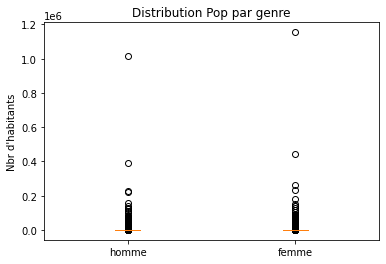

In [14]:
plt.boxplot( [df.pop_sexe_homme, df.pop_sexe_femme ])
plt.title('Distribution Pop par genre')
plt.ylabel("Nbr d'habitants")
plt.xticks([1,2], ['homme', 'femme']);

In [15]:
df['enfant'] = df['pop_age_0-5'] + df['pop_age_5-10'] + df['pop_age_10-15'] + df['pop_age_10-15']
df['jeunes_adultes'] = df['pop_age_15-20'] + df['pop_age_20-25'] + df['pop_age_25-30'] 
df['adulte _actifs'] = df['pop_age_30-35'] + df['pop_age_35-40'] + df['pop_age_40-45'] + df['pop_age_45-50'] + df['pop_age_50-55'] + df['pop_age_55-60']
df['retraités'] = df['pop_age_60-65'] + df['pop_age_65-70'] + df['pop_age_70-75'] + df['pop_age_75-80'] + df['pop_age_80+']

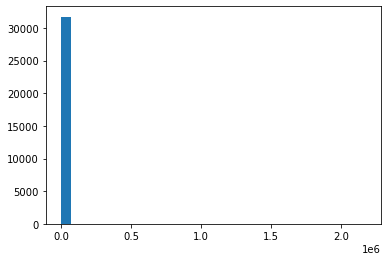

In [10]:
plt.hist(df.pop_total, bins = 30);


In [8]:
df.sort_values('pop_total', ascending = False).head(20)

numero_departement    nom_commune  code_region  \
26611                  75          Paris           11   
4007                   13      Marseille           93   
24660                  69           Lyon           82   
10497                  31       Toulouse           73   
1816                    6           Nice           93   
14637                  44         Nantes           52   
11582                  34    Montpellier           91   
24124                  67     Strasbourg           42   
10988                  33       Bordeaux           72   
20019                  59          Lille           31   
11946                  35         Rennes           53   
16707                  51          Reims           21   
26938                  76       Le Havre           23   
14197                  42  Saint-Etienne           82   
29519                  83         Toulon           93   
12650                  38       Grenoble           82   
6245                   21          Dijon           26   
9849                   30          Nîmes           91   
24788                  69   Villeurbanne           82   
15742                  49         Angers           52   

                       nom_region  codgeo   latitude  longitude  \
26611               Île-de-France   75000  48.866667   2.333333   
4007   Provence-Alpes-Côte d'Azur   13000  43.300000   5.400000   
24660                 Rhône-Alpes   69000  45.750000   4.850000   
10497               Midi-Pyrénées   31555  43.600000   1.433333   
1816   Provence-Alpes-Côte d'Azur    6088  43.700000   7.250000   
14637            Pays de la Loire   44109  47.216667  -1.550000   
11582        Languedoc-Roussillon   34172  43.600000   3.883333   
24124                      Alsace   67482  48.583333   7.750000   
10988                   Aquitaine   33063  44.833333  -0.566667   
20019          Nord-Pas-de-Calais   59350  50.633333   3.066667   
11946                    Bretagne   35238  48.083333  -1.683333   
16707           Champagne-Ardenne   51454  49.250000   4.033333   
26938             Haute-Normandie   76351  49.500000   0.133333   
14197                 Rhône-Alpes   42218  45.433333   4.400000   
29519  Provence-Alpes-Côte d'Azur   83137  43.116667   5.933333   
12650                 Rhône-Alpes   38185  45.166667   5.716667   
6245                    Bourgogne   21231  47.316667   5.016667   
9849         Languedoc-Roussillon   30189  43.833333   4.350000   
24788                 Rhône-Alpes   69266  45.766667   4.883333   
15742            Pays de la Loire   49007  47.466667  -0.550000   

            libgeo_x    nb_ent  nb_ent_0  ...  \
26611          Paris  427385.0  316603.0  ...   
4007       Marseille   68332.0   48557.0  ...   
24660           Lyon   49756.0   33047.0  ...   
10497       Toulouse   36823.0   24584.0  ...   
1816            Nice   39314.0   28345.0  ...   
14637         Nantes   22585.0   15381.0  ...   
11582    Montpellier   24508.0   17495.0  ...   
24124     Strasbourg   20882.0   13604.0  ...   
10988       Bordeaux   26116.0   17800.0  ...   
20019          Lille   19787.0   13148.0  ...   
11946         Rennes   13669.0    8727.0  ...   
16707          Reims   10388.0    6496.0  ...   
26938       Le Havre    7998.0    4663.0  ...   
14197  Saint-Étienne   11663.0    7251.0  ...   
29519         Toulon   11849.0    8447.0  ...   
12650       Grenoble   13207.0    8620.0  ...   
6245           Dijon   10130.0    6326.0  ...   
9849           Nîmes   12166.0    7873.0  ...   
24788   Villeurbanne    9440.0    6459.0  ...   
15742         Angers    8857.0    5532.0  ...   

       nombre_de_points_libelle_grand_secteur_agriculture  \
26611                                              197.0    
4007                                                18.0    
24660                                                6.0    
10497                                               14.0    
1816                                               115.0    
14637

## Population vs nombre d'entreprises

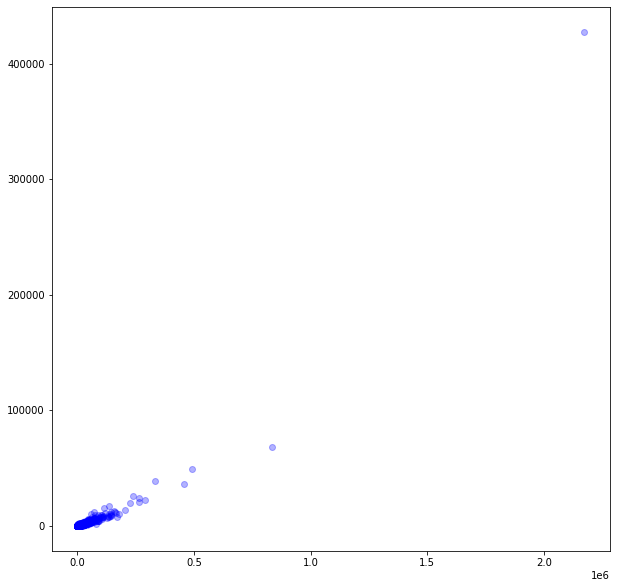

In [3]:
plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'],
    df['nb_ent'],
    color='b',
    alpha=.3
)
plt.show()

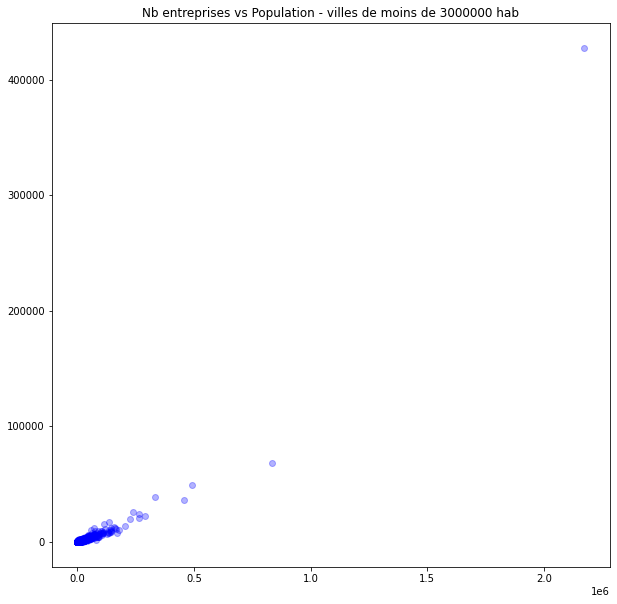

In [4]:
limite_pop = 3000000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'][df['pop_total'] < limite_pop],
    df['nb_ent'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Nb entreprises vs Population - villes de moins de {} hab'.format(limite_pop))


plt.show()

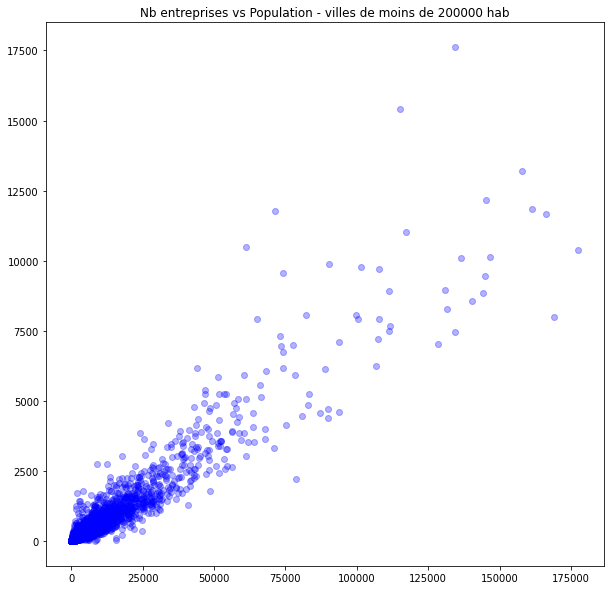

In [5]:
limite_pop = 200000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'][df['pop_total'] < limite_pop],
    df['nb_ent'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Nb entreprises vs Population - villes de moins de {} hab'.format(limite_pop))


plt.show()

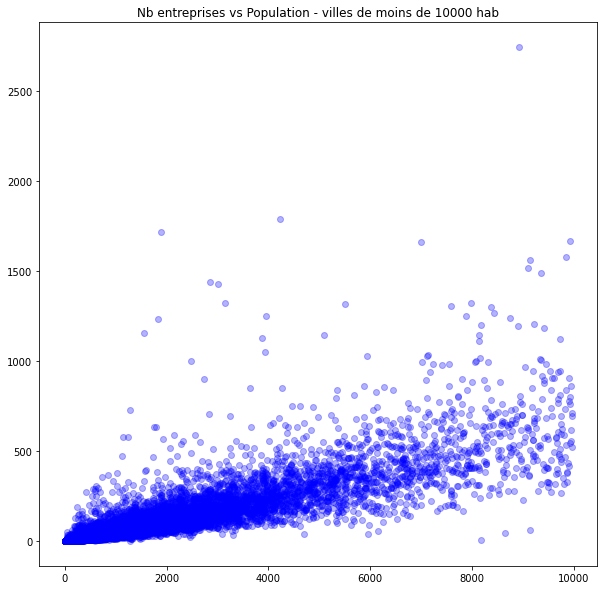

In [6]:
limite_pop = 10000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'][df['pop_total'] < limite_pop],
    df['nb_ent'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Nb entreprises vs Population - villes de moins de {} hab'.format(limite_pop))


plt.show()

## Consommation résidentielle vs nb habitants

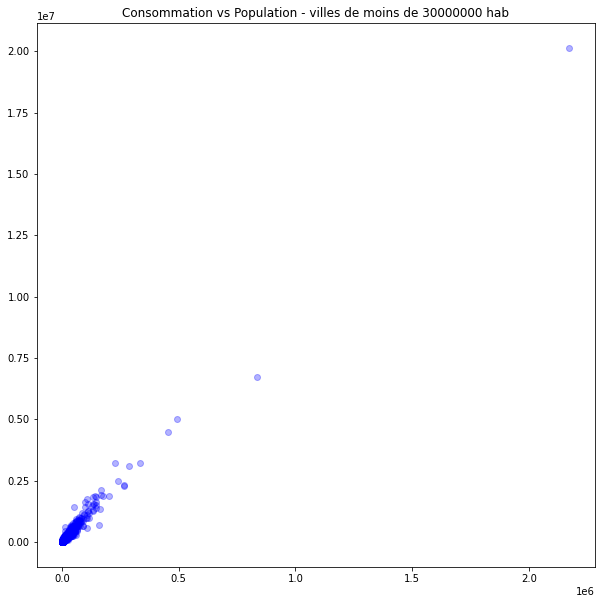

In [7]:
limite_pop = 30000000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'][df['pop_total'] < limite_pop],
    df['consommation_libelle_categorie_consommation_résidentiel'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Consommation vs Population - villes de moins de {} hab'.format(limite_pop))


plt.show()

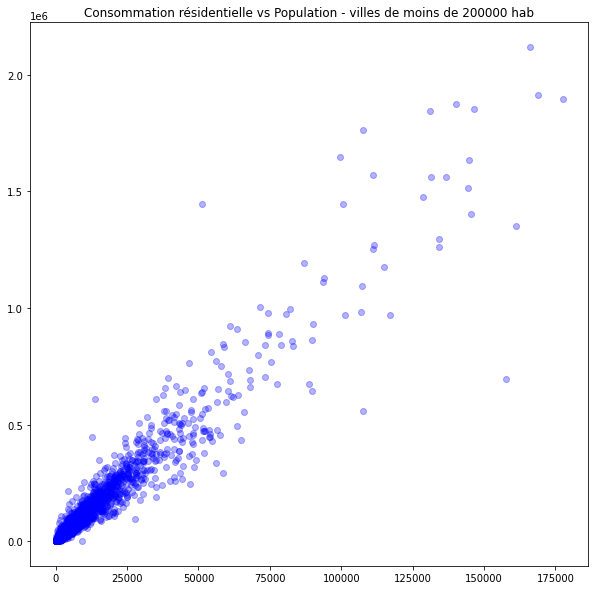

In [8]:
limite_pop = 200000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'][df['pop_total'] < limite_pop],
    df['consommation_libelle_categorie_consommation_résidentiel'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Consommation résidentielle vs Population - villes de moins de {} hab'.format(limite_pop))


plt.show()

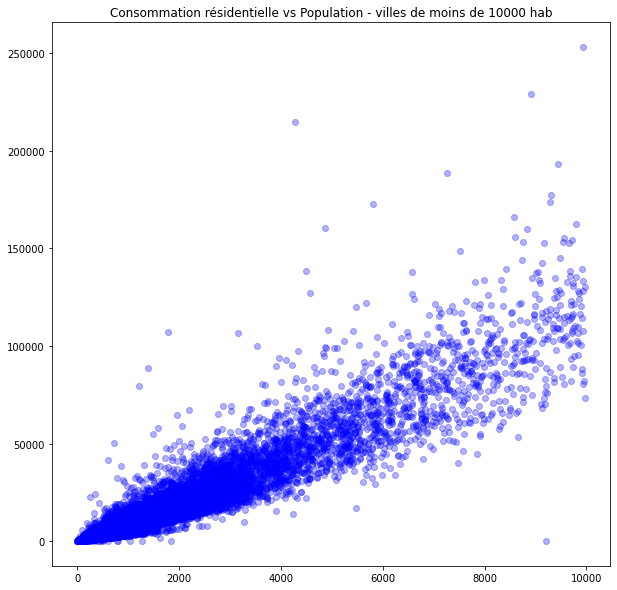

In [9]:
limite_pop = 10000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['pop_total'][df['pop_total'] < limite_pop],
    df['consommation_libelle_categorie_consommation_résidentiel'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Consommation résidentielle vs Population - villes de moins de {} hab'.format(limite_pop))


plt.show()

## Consommation entreprises vs Nb entreprises

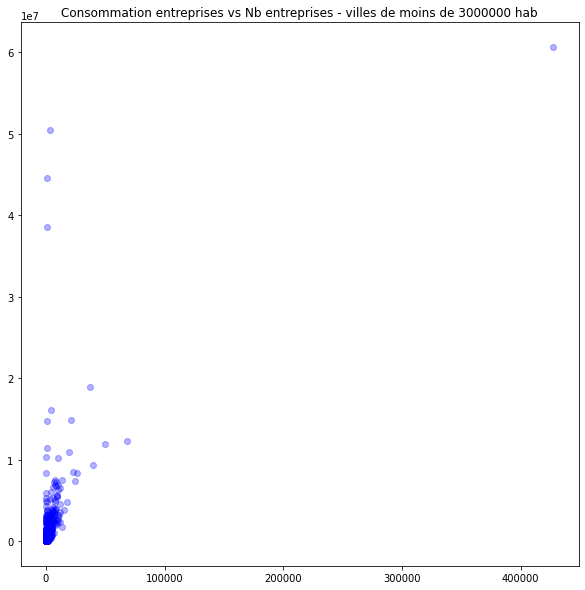

In [10]:
limite_pop = 3000000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['nb_ent'][df['pop_total'] < limite_pop],
    df['consommation_libelle_categorie_consommation_entreprises'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Consommation entreprises vs Nb entreprises - villes de moins de {} hab'.format(limite_pop))


plt.show()

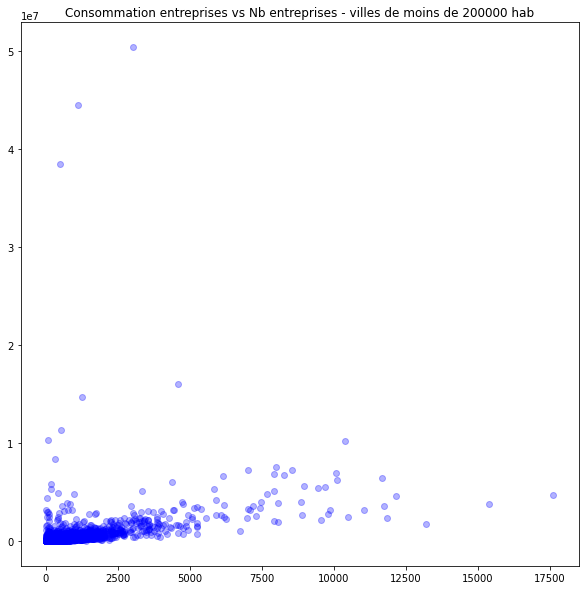

In [11]:
limite_pop = 200000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['nb_ent'][df['pop_total'] < limite_pop],
    df['consommation_libelle_categorie_consommation_entreprises'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Consommation entreprises vs Nb entreprises - villes de moins de {} hab'.format(limite_pop))


plt.show()

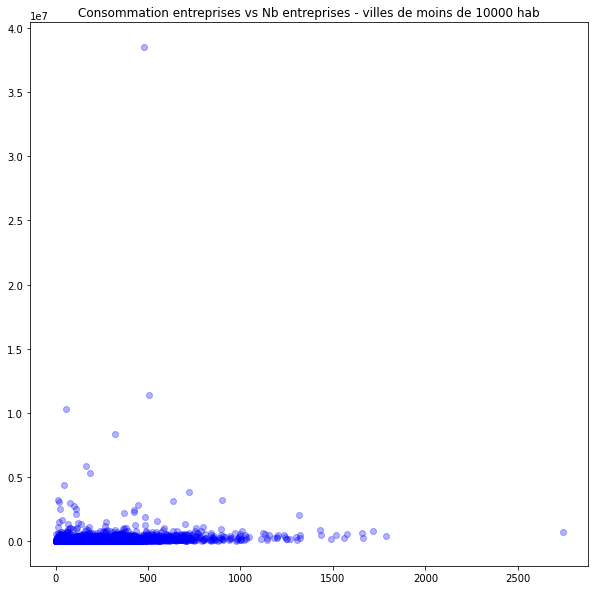

In [12]:
limite_pop = 10000

plt.figure(figsize=(10, 10))
plt.scatter(
    df['nb_ent'][df['pop_total'] < limite_pop],
    df['consommation_libelle_categorie_consommation_entreprises'][df['pop_total'] < limite_pop],
    c='b',
    alpha=.3
)

plt.title('Consommation entreprises vs Nb entreprises - villes de moins de {} hab'.format(limite_pop))


plt.show()

In [13]:
# point curieux -> correspond à Chamonix
df[df['pop_total'] < limite_pop].sort_values('nb_ent').tail()

numero_departement           nom_commune  code_region  \
26148                  73   Bourg-Saint-Maurice           82   
10945                  33              Arcachon           72   
26282                  73  Saint-Bon-Tarentaise           82   
29504                  83          Saint-Tropez           93   
26394                  74   Chamonix-Mont-Blanc           82   

                       nom_region  codgeo   latitude  longitude  \
26148                 Rhône-Alpes   73054  45.616667   6.766667   
10945                   Aquitaine   33009  44.658890  -1.163550   
26282                 Rhône-Alpes   73227  45.433333   6.633333   
29504  Provence-Alpes-Côte d'Azur   83119  43.266667   6.633333   
26394                 Rhône-Alpes   74056  45.916667   6.866667   

                   libgeo_x  nb_ent  nb_ent_0  ...  \
26148   Bourg-Saint-Maurice  1659.0    1242.0  ...   
10945              Arcachon  1665.0    1085.0  ...   
26282  Saint-Bon-Tarentaise  1718.0    1378.0  ...   
29504          Saint-Tropez  1788.0    1174.0  ...   
26394   Chamonix-Mont-Blanc  2743.0    2121.0  ...   

       nombre_de_points_libelle_grand_secteur_agriculture  \
26148                                               52.0    
10945                                                1.0    
26282                                               12.0    
29504                                                9.0    
26394                                                3.0    

       consommation_libelle_grand_secteur_agriculture  \
26148                                      986.095411   
10945                                      129.236000   
26282                                     1170.657820   
29504                                      301.606793   
26394                                      168.334913   

       nombre_de_points_libelle_grand_secteur_industrie  \
26148                                             559.0   
10945                                             283.0   
26282                                             458.0   
29504                                             305.0   
26394                                             318.0   

       consommation_libelle_grand_secteur_industrie  \
26148                                 150398.702959   
10945                                  46809.787915   
26282                                  66936.189041   
29504                                   9771.462771   
26394                                  18032.142307   

       nombre_de_points_libelle_grand_secteur_secteur inconnu  \
26148                                             1680.0        
10945                                             1061.0        
26282                                              792.0        
29504                                              496.0        
26394                                              848.0        

       consommation_libelle_grand_secteur_secteur inconnu  \
26148                                       10617.971636    
10945                                        9583.038414    
26282                                        9036.102133    
29504                                        6595.185243    
26394                                       17852.417148    

       nombre_de_points_libelle_grand_secteur_tertiaire  \
26148                                            4601.0   
10945                                            5036.0   
26282                                            6522.0   
29504                                            5471.0   
26394                                            6559.0   

       consommation_libelle_grand_secteur_tertiaire  \
26148                                 535653.520939   
10945                                 251238.502493   
26282                                 764349.324862   
29504                                 425731.509569   
26394                                 779400.206011   

      nombre_de_points_libelle_grand_secteur_résidenti

In [14]:
# on retrouve aussi nos rafinneries
df[df['pop_total'] < limite_pop].sort_values('consommation_libelle_categorie_consommation_entreprises').tail()

numero_departement                nom_commune  code_region  \
17545                  54  Blénod-lès-Pont-à-Mousson           41   
27031                  76   Notre-Dame-de-Gravenchon           23   
24208                  68                Bantzenheim           42   
14631                  44        Montoir-de-Bretagne           52   
26850                  76       Gonfreville-l'Orcher           23   

             nom_region  codgeo   latitude  longitude  \
17545          Lorraine   54079  48.883333   6.050000   
27031   Haute-Normandie   76476  49.483333   0.583333   
24208            Alsace   68020  47.833333   7.500000   
14631  Pays de la Loire   44103  47.333333  -2.150000   
26850   Haute-Normandie   76305  49.500000   0.233333   

                        libgeo_x  nb_ent  nb_ent_0  ...  \
17545  Blénod-lès-Pont-à-Mousson   162.0     110.0  ...   
27031   Notre-Dame-de-Gravenchon   324.0     158.0  ...   
24208                Bantzenheim    57.0      36.0  ...   
14631        Montoir-de-Bretagne   507.0     263.0  ...   
26850       Gonfreville-l'Orcher   479.0     168.0  ...   

       nombre_de_points_libelle_grand_secteur_agriculture  \
17545                                                0.0    
27031                                               21.0    
24208                                               30.0    
14631                                                0.0    
26850                                                2.0    

       consommation_libelle_grand_secteur_agriculture  \
17545                                        0.000000   
27031                                      249.075357   
24208                                     1705.045995   
14631                                        0.000000   
26850                                       95.374645   

       nombre_de_points_libelle_grand_secteur_industrie  \
17545                                              62.0   
27031                                             201.0   
24208                                              19.0   
14631                                             399.0   
26850                                             360.0   

       consommation_libelle_grand_secteur_industrie  \
17545                                  5.843814e+06   
27031                                  8.127886e+06   
24208                                  1.031629e+07   
14631                                  1.110145e+07   
26850                                  3.447819e+07   

       nombre_de_points_libelle_grand_secteur_secteur inconnu  \
17545                                              102.0        
27031                                              139.0        
24208                                               29.0        
14631                                              331.0        
26850                                              513.0        

       consommation_libelle_grand_secteur_secteur inconnu  \
17545                                         645.026832    
27031                                        1282.012593    
24208                                         164.760297    
14631                                        2891.532076    
26850                                        7678.258148    

       nombre_de_points_libelle_grand_secteur_tertiaire  \
17545                                             454.0   
27031                                            1303.0   
24208                                             131.0   
14631                                            1228.0   
26850                                            1622.0   

       consommation_libelle_grand_secteur_tertiaire  \
17545                                  1.177247e+04   
27031                                  2.339125e+05   
24208                                  8.056105e+03   
14631                                  3.009313e+05   
26850                                  4.061441e+06   

      nombre_de_points_libelle_grand_secteur_résidenti

## Cartes de consommation electrique

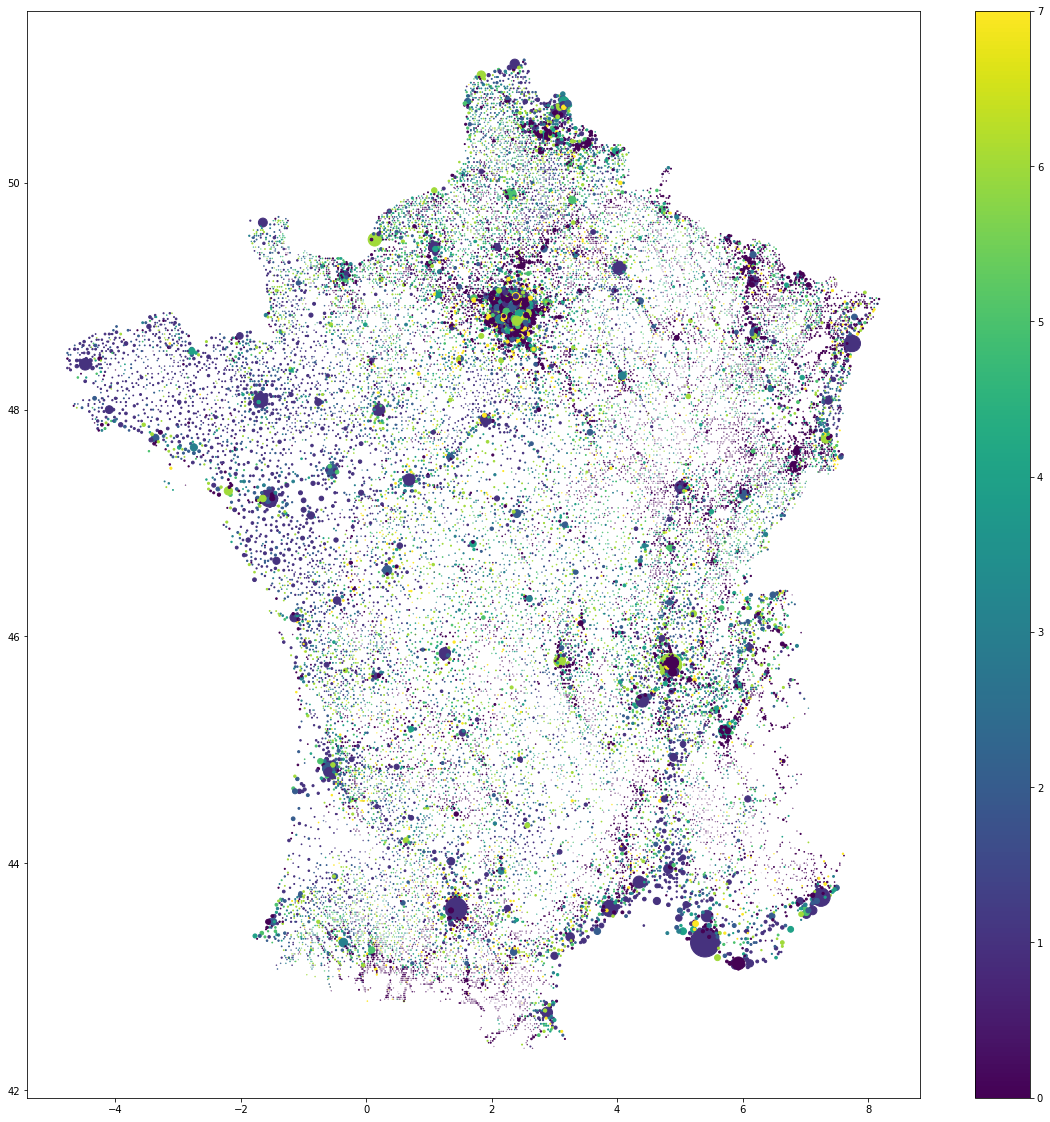

In [15]:
# Taille du point  : fonction de taille de population totale, et couloeur du point fonction de conso secteur agricole
plt.figure(figsize=(20, 20))

plt.scatter(
    df['longitude'],
    df['latitude'],
    s=df['pop_total'] * 0.001,
    c=transform_into_bins(df['consommation_libelle_grand_secteur_agriculture'])
)
# transform_into_bins est une fonction permettant de transformer x en quantiles de x 
plt.colorbar()

plt.show()

In [16]:
# point étrange -> Arles: d'apres Wikipedia forte agriculture
df.sort_values('consommation_libelle_grand_secteur_agriculture').tail()

numero_departement    nom_commune  code_region  \
25902                  72      La Flèche           52   
3957                   13  Berre-l'Etang           93   
9479                   29       Guipavas           53   
6839                   22   Ploubazlanec           53   
3949                   13          Arles           93   

                       nom_region  codgeo   latitude  longitude  \
25902            Pays de la Loire   72154  47.700000  -0.083333   
3957   Provence-Alpes-Côte d'Azur   13014  43.466667   5.183333   
9479                     Bretagne   29075  48.433333  -4.400000   
6839                     Bretagne   22210  48.800000  -3.033333   
3949   Provence-Alpes-Côte d'Azur   13004  43.666667   4.633333   

            libgeo_x  nb_ent  nb_ent_0  ...  \
25902      La Flèche   865.0     464.0  ...   
3957   Berre-l'Étang   744.0     483.0  ...   
9479        Guipavas   844.0     429.0  ...   
6839    Ploubazlanec   155.0     119.0  ...   
3949           Arles  4320.0    2942.0  ...   

       nombre_de_points_libelle_grand_secteur_agriculture  \
25902                                               75.0    
3957                                               459.0    
9479                                               164.0    
6839                                               101.0    
3949                                              1690.0    

       consommation_libelle_grand_secteur_agriculture  \
25902                                   156535.717323   
3957                                    182958.271589   
9479                                    253800.509321   
6839                                    255781.858986   
3949                                    299026.780465   

       nombre_de_points_libelle_grand_secteur_industrie  \
25902                                             300.0   
3957                                              249.0   
9479                                              491.0   
6839                                               28.0   
3949                                              796.0   

       consommation_libelle_grand_secteur_industrie  \
25902                                 297273.020784   
3957                                  888814.577816   
9479                                  681220.461953   
6839                                    1671.086722   
3949                                  344083.005697   

       nombre_de_points_libelle_grand_secteur_secteur inconnu  \
25902                                              319.0        
3957                                               261.0        
9479                                               763.0        
6839                                               158.0        
3949                                              1305.0        

       consommation_libelle_grand_secteur_secteur inconnu  \
25902                                       15671.258901    
3957                                        10996.540126    
9479                                        16065.821153    
6839                                          817.526077    
3949                                        52167.935893    

       nombre_de_points_libelle_grand_secteur_tertiaire  \
25902                                            2560.0   
3957                                             1758.0   
9479                                             1947.0   
6839                                              282.0   
3949                                             9832.0   

       consommation_libelle_grand_secteur_tertiaire  \
25902                                 309863.674951   
3957                                  113294.629165   
9479                                  661635.222127   
6839                                   20196.034044   
3949                                  896762.922606   

      nombre_de_points_libelle_grand_secteur_résidentiel  \
25902                                           111373.0   
3957              

In [12]:
df['consommation_libelle_grand_secteur_industrie'].describe()

count    3.178000e+04
mean     2.423942e+04
std      4.677882e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.879642e+01
75%      7.905287e+02
max      4.942214e+07
Name: consommation_libelle_grand_secteur_industrie, dtype: float64

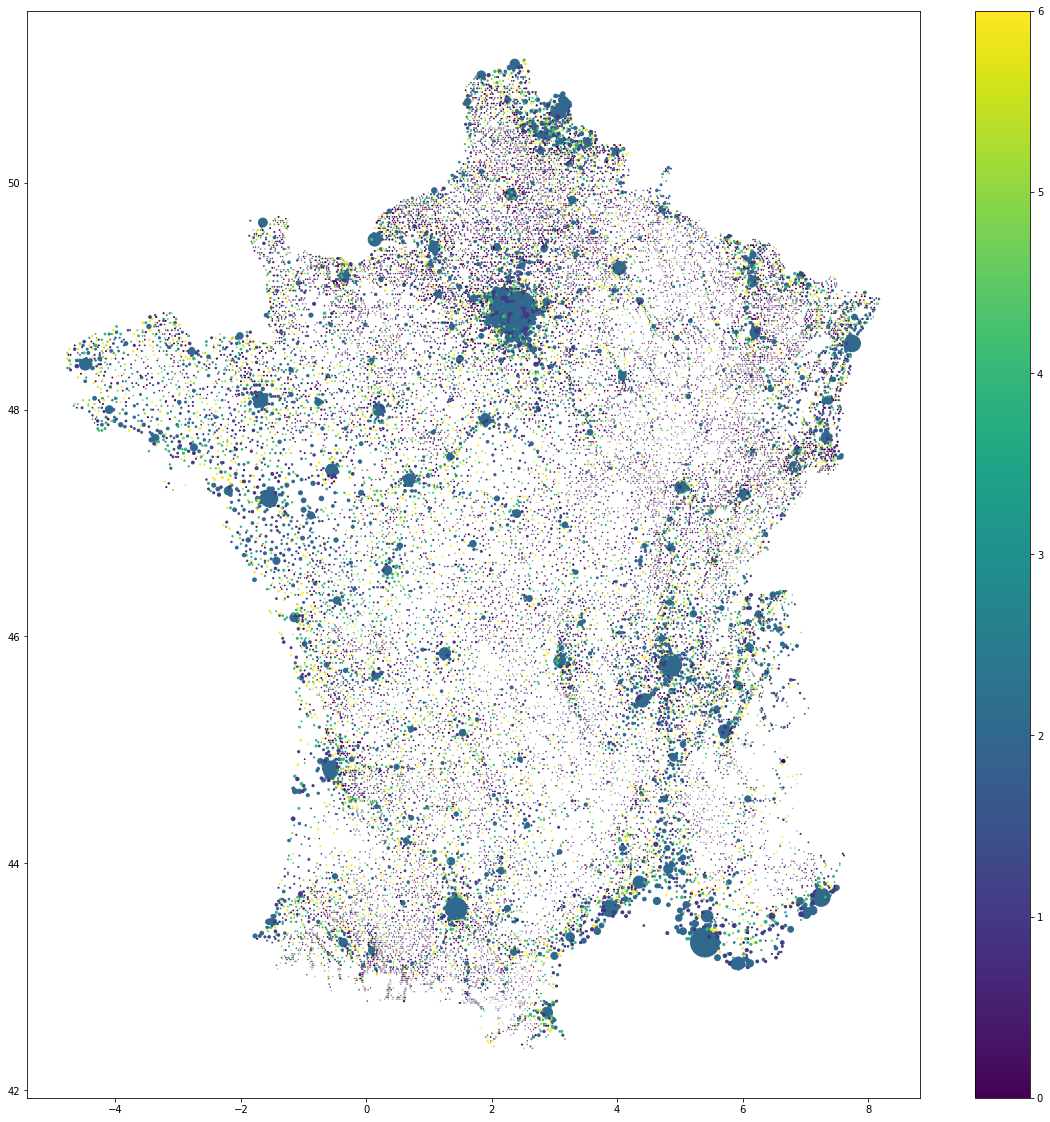

In [18]:
# Taille du point  : fonction de taille de population totale, et couleur du point fonction de conso secteur Industrie
plt.figure(figsize=(20, 20))

plt.scatter(
    df['longitude'],
    df['latitude'],
    s=df['pop_total'] * 0.001,
    c=transform_into_bins(df['consommation_libelle_grand_secteur_industrie'])
)

plt.colorbar()

plt.show()

In [19]:
df['bins_secteur_industrie'] = transform_into_bins(df['consommation_libelle_grand_secteur_industrie'])

In [21]:
df['bins_secteur_industrie'].value_counts()

0    14439
6     3178
5     3178
4     3178
2     3178
1     3178
3     1451
Name: bins_secteur_industrie, dtype: int64

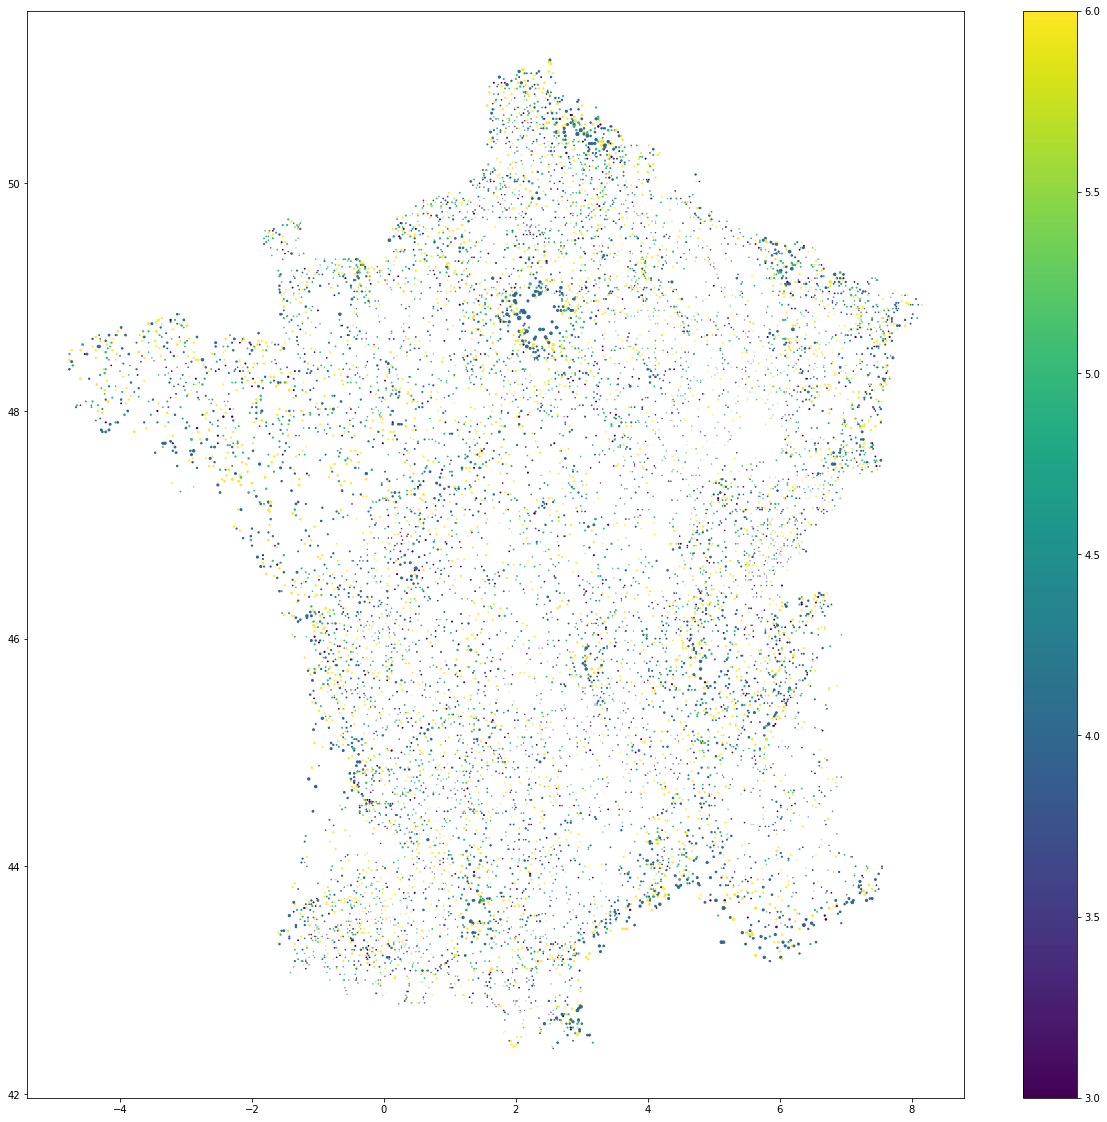

In [27]:
limit_industrie = 2

plt.figure(figsize=(21, 20))

plt.scatter(
    df['longitude'][df['bins_secteur_industrie'] > limit_industrie],
    df['latitude'][df['bins_secteur_industrie'] > limit_industrie],
    s=df['pop_total'][df['bins_secteur_industrie'] > limit_industrie] * 0.001,
    c=df['bins_secteur_industrie'][df['bins_secteur_industrie'] > limit_industrie]
)

plt.colorbar()

plt.show()

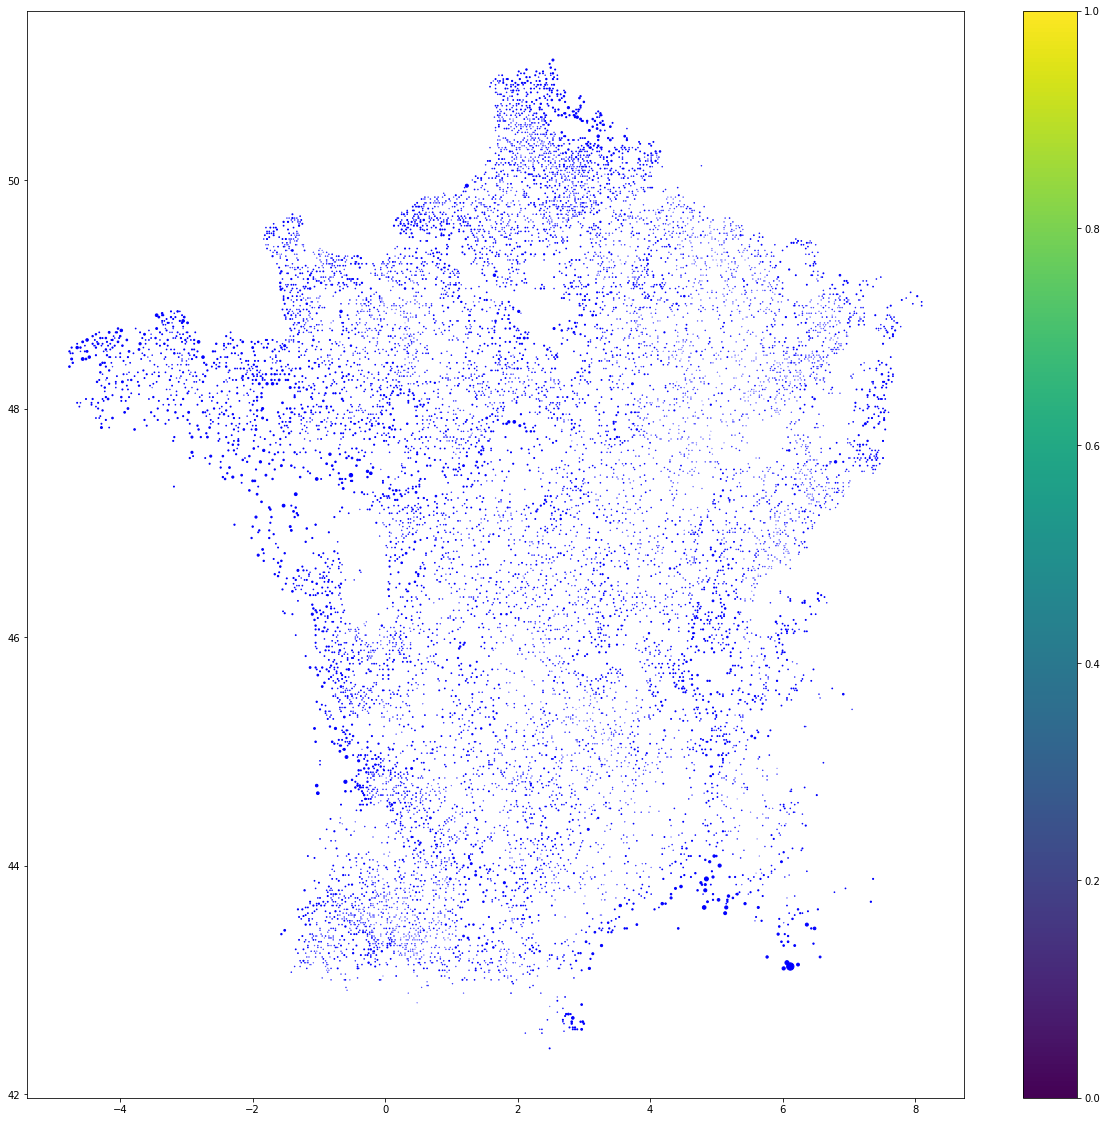

In [29]:
limit_industrie = 2

plt.figure(figsize=(21, 20))

plt.scatter(
    df['longitude'][df['consommation_libelle_grand_secteur_agriculture'] > df['consommation_libelle_grand_secteur_industrie']],
    df['latitude'][df['consommation_libelle_grand_secteur_agriculture'] > df['consommation_libelle_grand_secteur_industrie']],
    s=df['pop_total'][df['consommation_libelle_grand_secteur_agriculture'] > df['consommation_libelle_grand_secteur_industrie']] * 0.001,
    c='b'#df['bins_secteur_industrie'][df['consommation_libelle_grand_secteur_agriculture'] > df['consommation_libelle_grand_secteur_industrie']],
)

plt.colorbar()
plt.title('Ville dans lesquelles la consommation agricole est plus importante que la consommation industrielle')
plt.show()

In [14]:
df['max_conso'] = np.argmax(
    df[
        [
            'consommation_libelle_grand_secteur_agriculture',
            'consommation_libelle_grand_secteur_industrie',
            'consommation_libelle_grand_secteur_tertiaire',
#             'consommation_libelle_grand_secteur_résidentiel'
        ]
    ].values, 
    axis=1)

df['max_conso'] = df['max_conso'].replace({0: 'agriculture', 1: 'industrie', 2: 'tertiaire'})

df['max_conso'].value_counts()



tertiaire      17413
agriculture     9323
industrie       5044
Name: max_conso, dtype: int64

In [15]:
df['max_conso']

0        agriculture
1          tertiaire
2          tertiaire
3          tertiaire
4        agriculture
            ...     
31775      tertiaire
31776      tertiaire
31777      tertiaire
31778      tertiaire
31779      tertiaire
Name: max_conso, Length: 31780, dtype: object

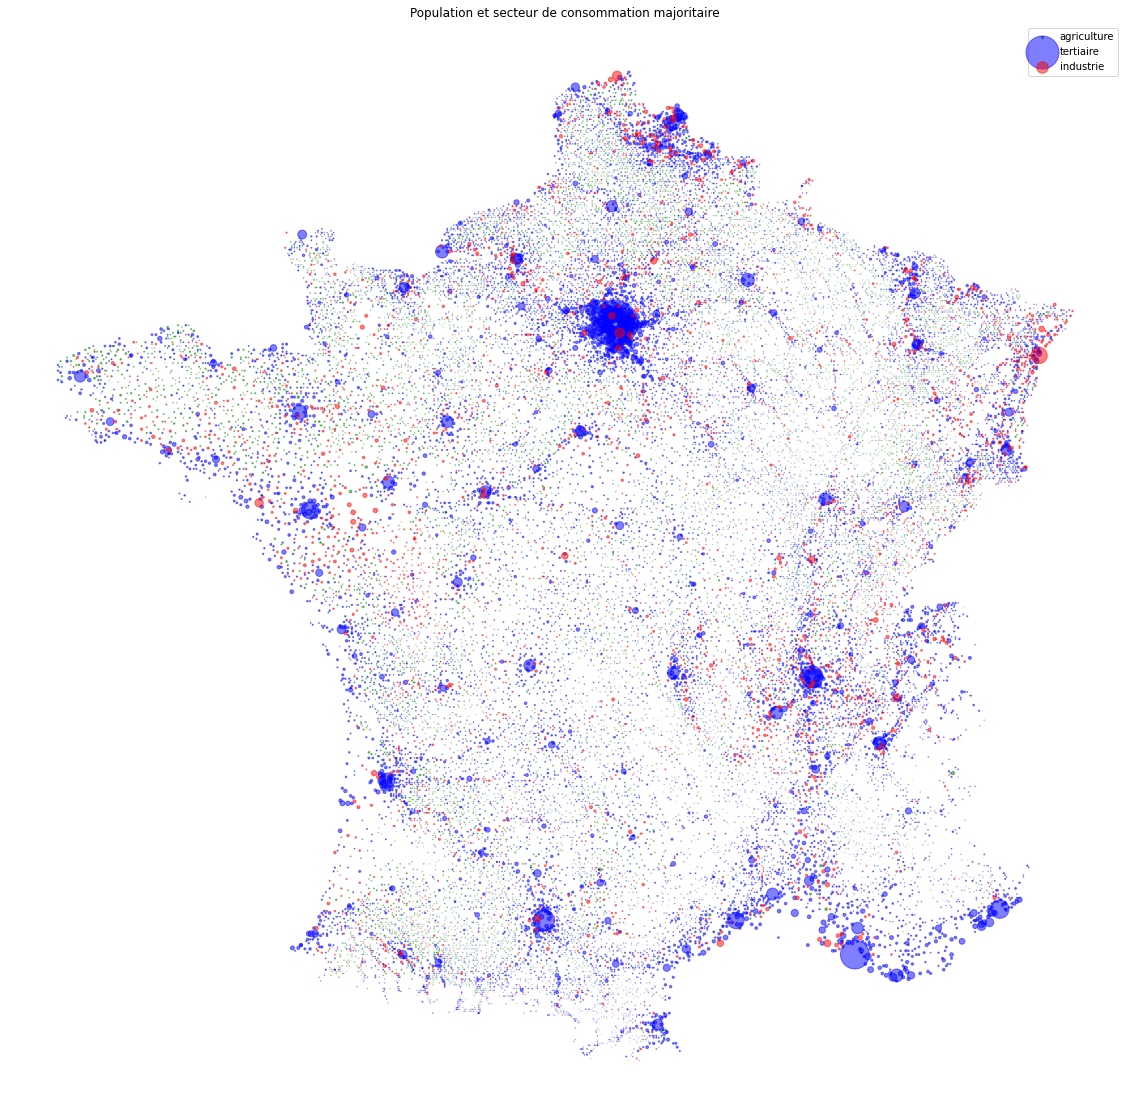

In [139]:
plt.figure(figsize=(20, 20))


colors = {
    'tertiaire': 'b',
    'industrie': 'r',
    'agriculture': 'g'
}

secteurs = df['max_conso'].unique()


for i, val in enumerate(secteurs):
    plt.scatter(
        x=df['longitude'][df['max_conso'] == val],
        y=df['latitude'][df['max_conso'] == val],
        s=df['pop_total'][df['max_conso'] == val]* 0.001,
        label=val,
        alpha=.5,
        c=colors[val]
    )
plt.title('Population et secteur de consommation majoritaire')
plt.legend()

plt.axis('off')
plt.savefig('carte_population_secteur_bg.png', facecolor='w')
plt.show()

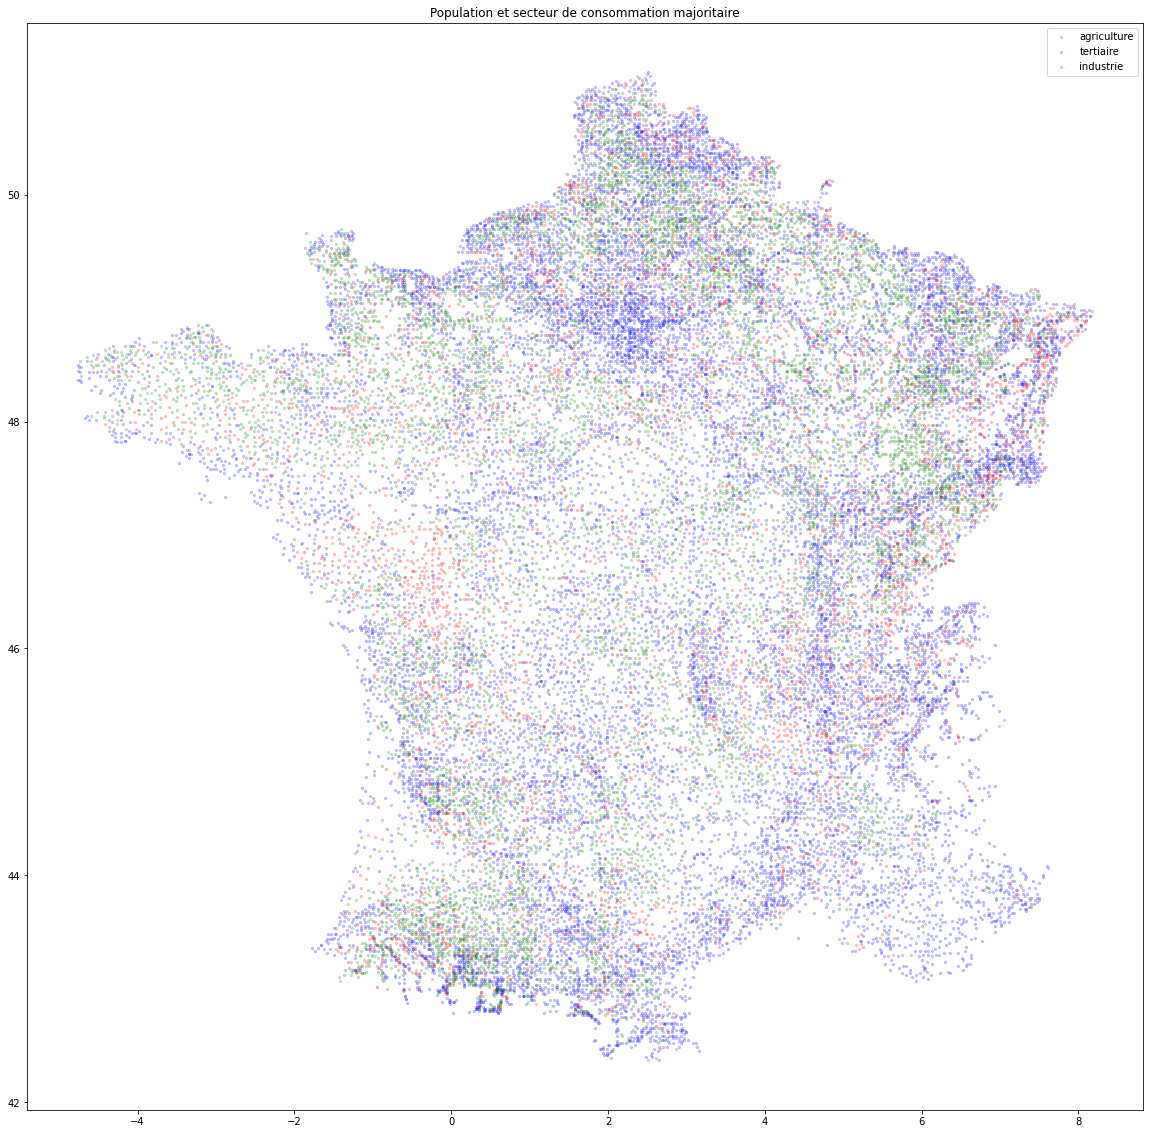

In [133]:
plt.figure(figsize=(20, 20))


colors = {
    'tertiaire': 'b',
    'industrie': 'r',
    'agriculture': 'g'
}

secteurs = df['max_conso'].unique()


for i, val in enumerate(secteurs):
    plt.scatter(
        x=df['longitude'][df['max_conso'] == val],
        y=df['latitude'][df['max_conso'] == val],
        s=5,#df['pop_total'][df['max_conso'] == val]* 0.001,
        label=val,
        alpha=.2,
        c=colors[val]
    )
plt.title('Population et secteur de consommation majoritaire')
plt.legend()

plt.show()

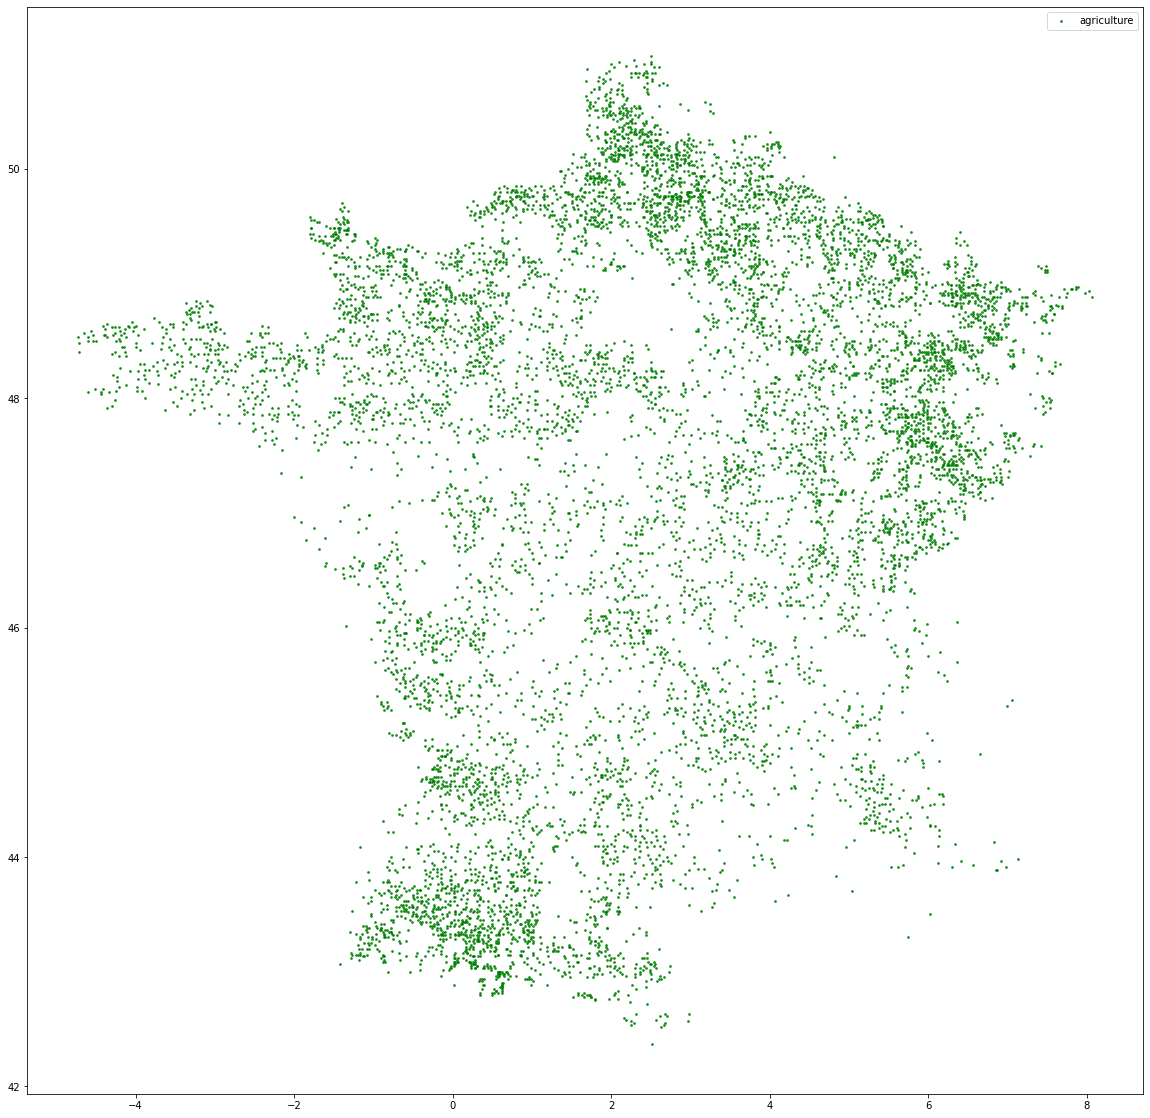

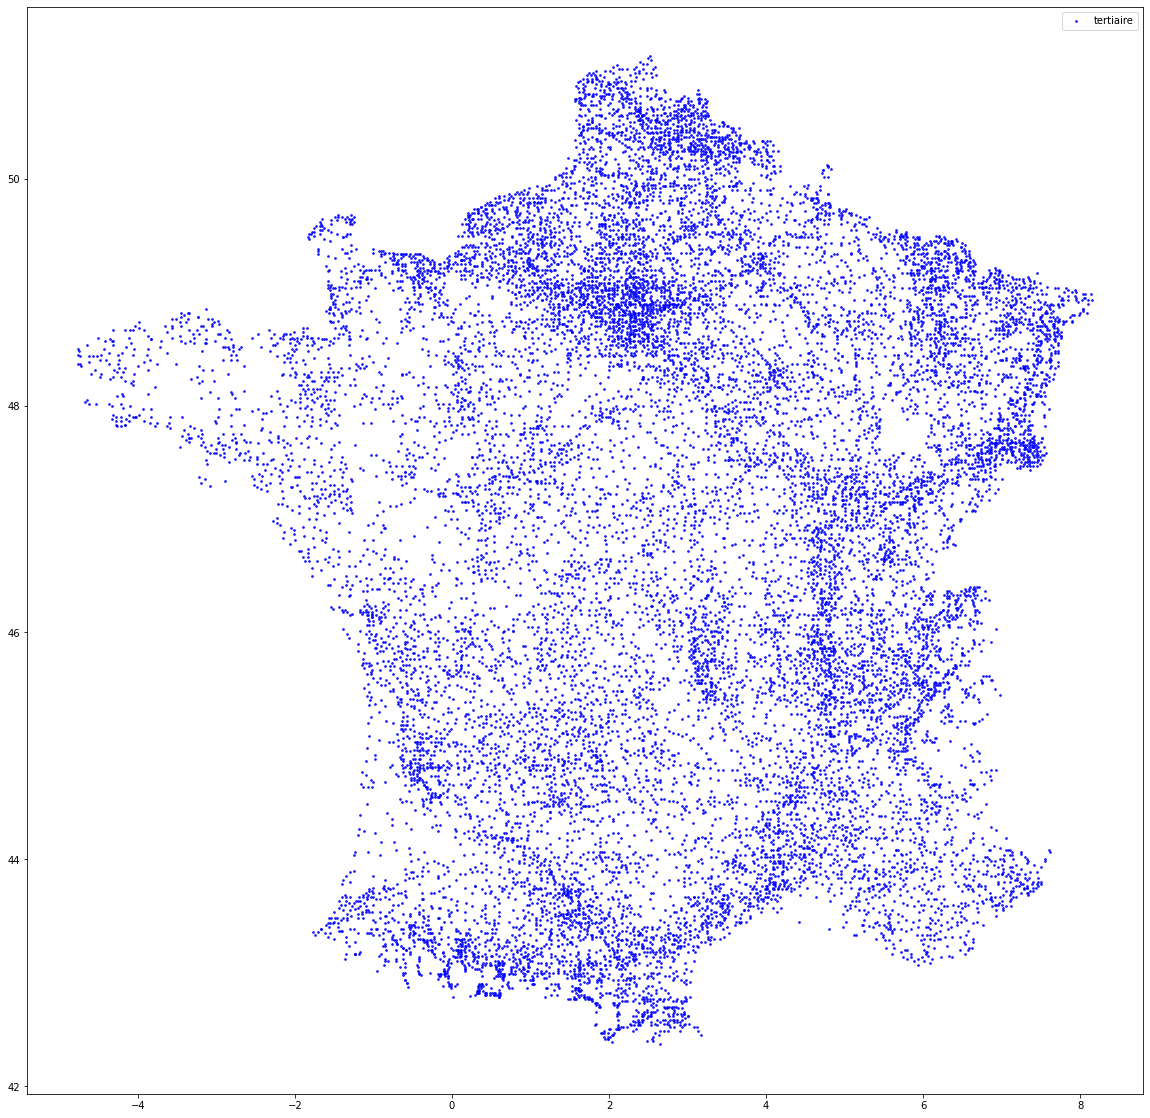

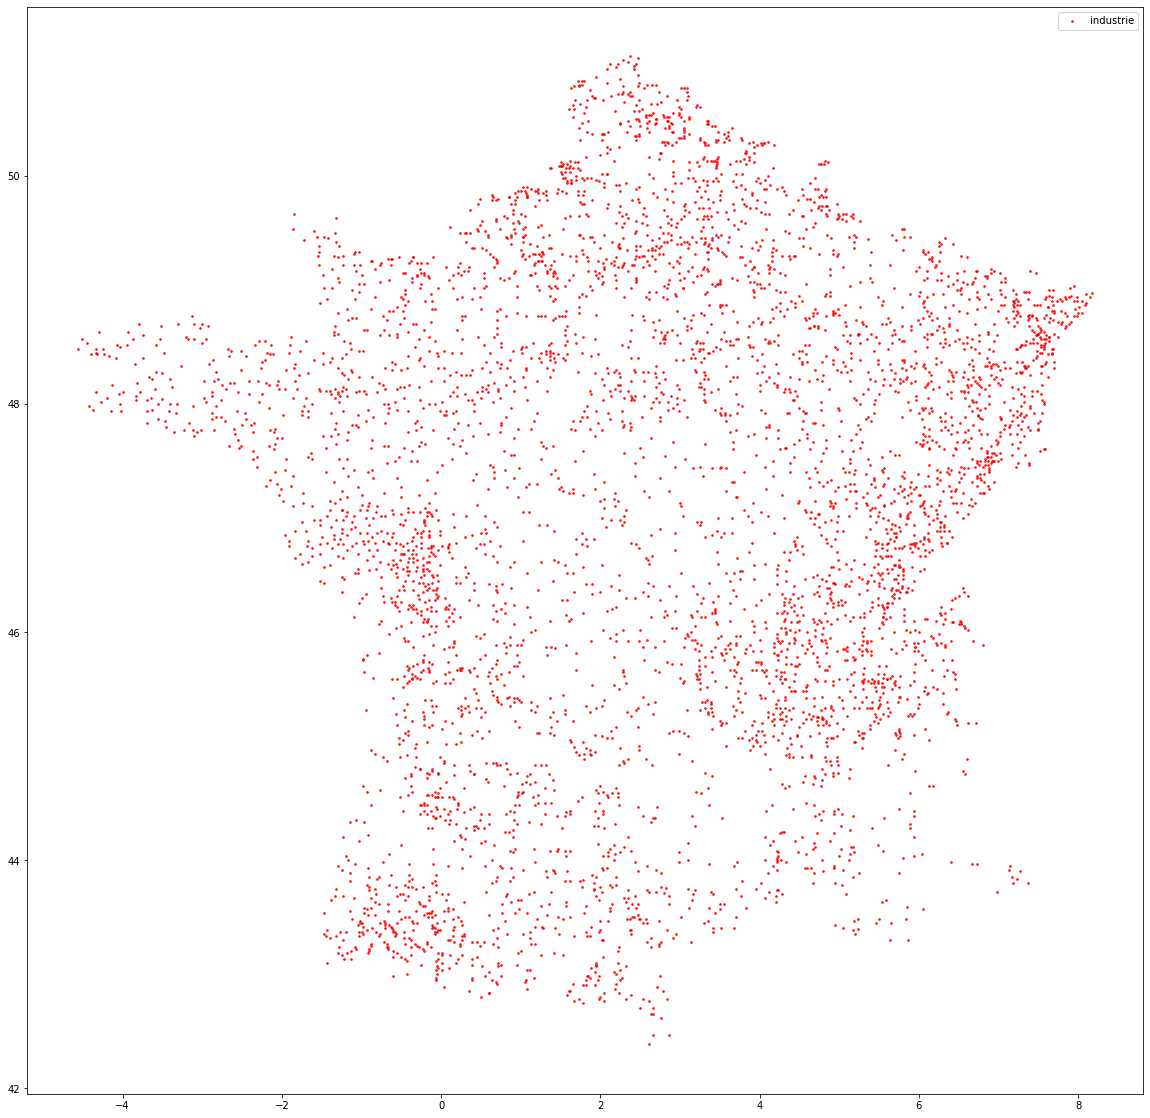

In [135]:

for i, val in enumerate(df['max_conso'].unique()):
    plt.figure(figsize=(20, 20))

    plt.scatter(
        x=df['longitude'][df['max_conso'] == val],
        y=df['latitude'][df['max_conso'] == val],
        s=3,
#         s=df['pop_total'][df['max_conso'] == val]* 0.001,
        label=val,
        alpha=.8,
        c=colors[val]
    )
    
    plt.legend()

    plt.show()

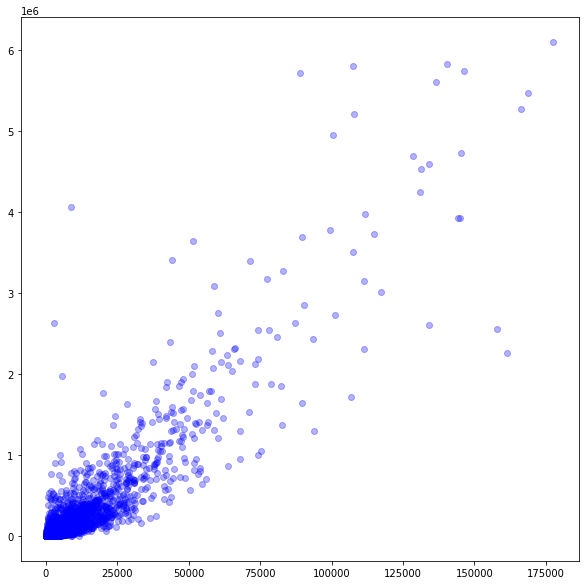

In [78]:
plt.figure(figsize=(10, 10))

population_limite = 200000



plt.scatter(
    df['pop_total'][df['pop_total'] < population_limite],
    df['consommation_libelle_grand_secteur_tertiaire'][df['pop_total'] < population_limite],
    alpha=.3,
    color=colors['tertiaire']
    
)

plt.show()

In [79]:
df[df['pop_total'] < population_limite].sort_values(['consommation_libelle_grand_secteur_résidentiel']).tail()

numero_departement               nom_commune  code_region  \
26938                  76                  Le Havre           23   
6245                   21                     Dijon           26   
14197                  42             Saint-Etienne           82   
16707                  51                     Reims           21   
23659                  66  Saint-Laurent-de-Cerdans           91   

                 nom_region  codgeo   latitude  longitude  \
26938       Haute-Normandie   76351  49.500000   0.133333   
6245              Bourgogne   21231  47.316667   5.016667   
14197           Rhône-Alpes   42218  45.433333   4.400000   
16707     Champagne-Ardenne   51454  49.250000   4.033333   
23659  Languedoc-Roussillon   66179  42.383333   2.616667   

                       libgeo_x   nb_ent  nb_ent_0  ...  \
26938                  Le Havre   7998.0    4663.0  ...   
6245                      Dijon  10130.0    6326.0  ...   
14197             Saint-Étienne  11663.0    7251.0  ...   
16707                     Reims  10388.0    6496.0  ...   
23659  Saint-Laurent-de-Cerdans     62.0      48.0  ...   

       nombre_de_points_libelle_grand_secteur_industrie  \
26938                                            1928.0   
6245                                             2422.0   
14197                                            4209.0   
16707                                            3592.0   
23659                                             909.0   

       consommation_libelle_grand_secteur_industrie  \
26938                                  2.268444e+06   
6245                                   8.509475e+05   
14197                                  1.587508e+06   
16707                                  4.466077e+06   
23659                                  5.402649e+05   

       nombre_de_points_libelle_grand_secteur_secteur inconnu  \
26938                                             7396.0        
6245                                              7884.0        
14197                                             6878.0        
16707                                             7187.0        
23659                                              168.0        

       consommation_libelle_grand_secteur_secteur inconnu  \
26938                                      102857.437221    
6245                                       208977.137710    
14197                                      303041.558068    
16707                                      123914.877491    
23659                                       89833.940000    

       nombre_de_points_libelle_grand_secteur_tertiaire  \
26938                                           28683.0   
6245                                            33163.0   
14197                                           36847.0   
16707                                           37103.0   
23659                                             103.0   

       consommation_libelle_grand_secteur_tertiaire  \
26938                                  5.467062e+06   
6245                                   5.735258e+06   
14197                                  5.267797e+06   
16707                                  6.100252e+06   
23659                                  1.145540e+03   

       nombre_de_points_libelle_grand_secteur_résidentiel  \
26938                                          1339851.0    
6245                                           1317486.0    
14197                                          1425799.0    
16707                                          1434754.0    
23659                                             6826.0    

       consommation_libelle_grand_secteur_résidentiel bins_secteur_industrie  \
26938                                    9.517044e+06                      2   
6245                                     9.820139e+06                      2   
14197                                    1.080747e+07                      2   
16707                                    1.082467e+07      

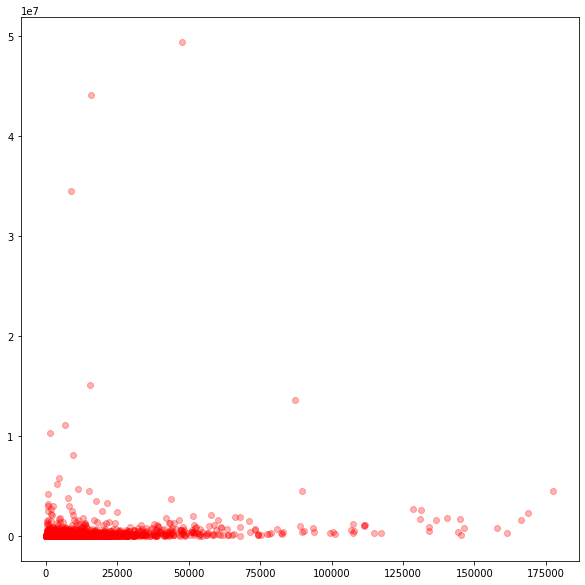

In [80]:
plt.figure(figsize=(10, 10))

population_limite = 200000



plt.scatter(
    df['pop_total'][df['pop_total'] < population_limite],
    df['consommation_libelle_grand_secteur_industrie'][df['pop_total'] < population_limite],
    alpha=.3,
    color=colors['industrie']
    
)



plt.show()

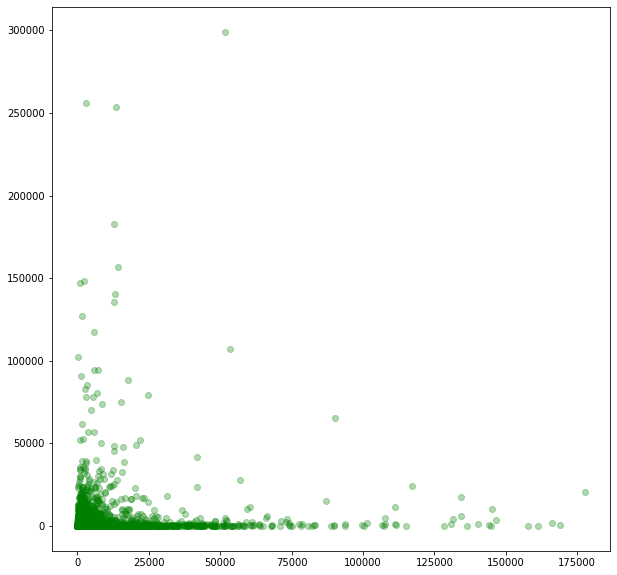

In [81]:
plt.figure(figsize=(10, 10))

population_limite = 200000



plt.scatter(
    df['pop_total'][df['pop_total'] < population_limite],
    df['consommation_libelle_grand_secteur_agriculture'][df['pop_total'] < population_limite],
    alpha=.3,
    color=colors['agriculture']
    
)



plt.show()

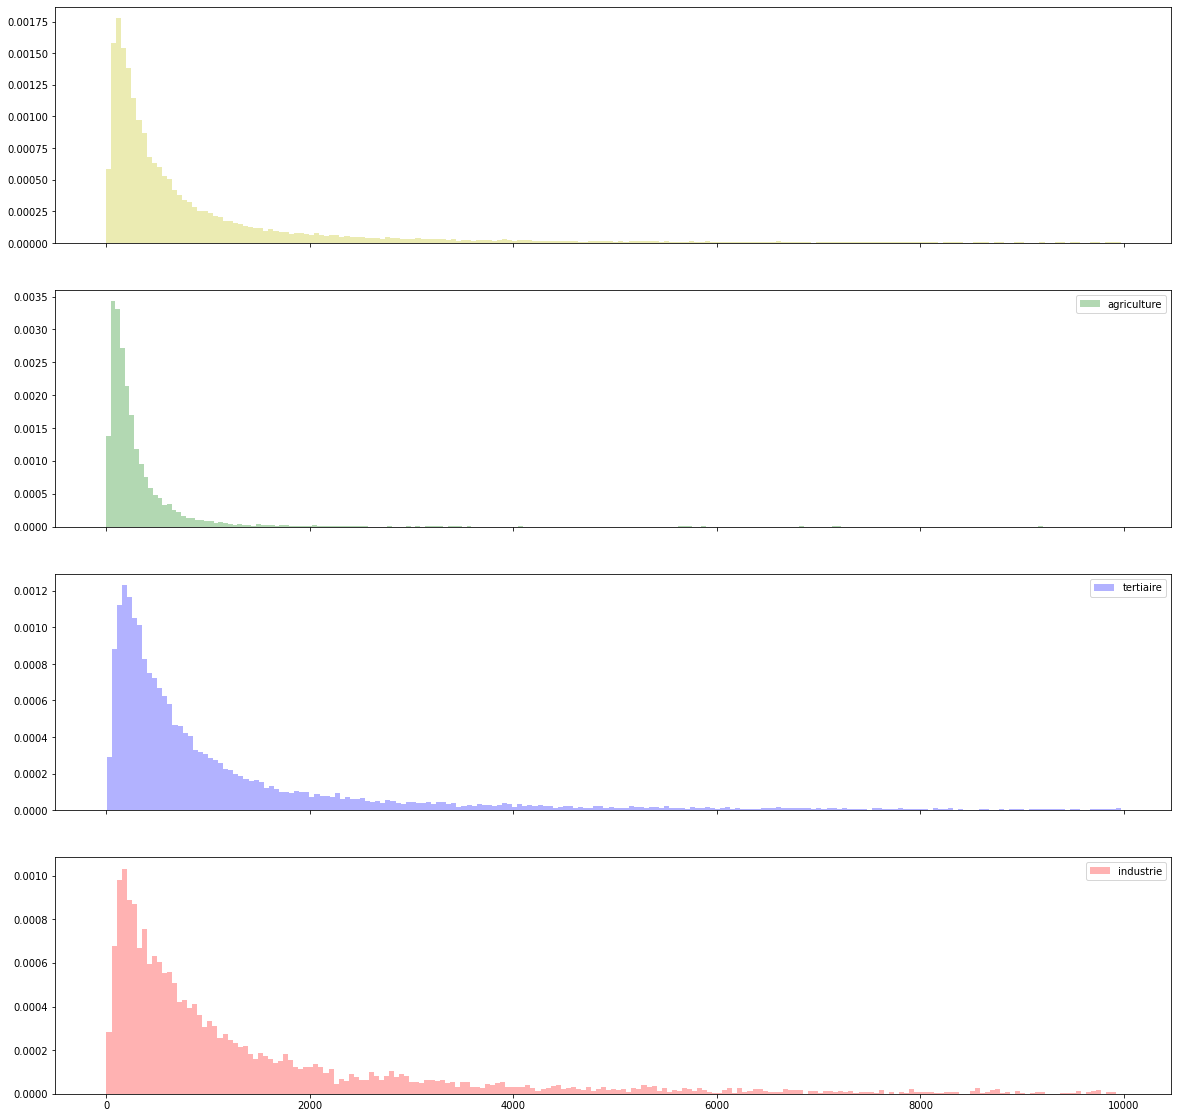

In [119]:
bins = 200
limit_population = 10000

fig, axes = plt.subplots(4, figsize=(20, 20), sharex=True)

axes[0].hist(
    df['pop_total'][df['pop_total'] < limit_population],
    bins=bins,
    label='total',
    color='y',
    alpha=.3,
    density=True
)

# axes[0].hist(
#     df['pop_total'][df['pop_total'] < limit_population],
#     bins=bins,
#     label='total' + ' cumulatif',
#     color='y',
#     density=True,
#     histtype='step',
#     cumulative=True,
# )


for i, val in enumerate(secteurs): 
    axes[i + 1].hist(
        df[df['max_conso'] == val]['pop_total'][df['pop_total'] < limit_population],
        bins=bins,
        label=val,
        color=colors[val],
        alpha=.3,
        density=True,
#         histtype='step',
#         cumulative=True
    )
    
    axes[i+1].legend()
plt.show()

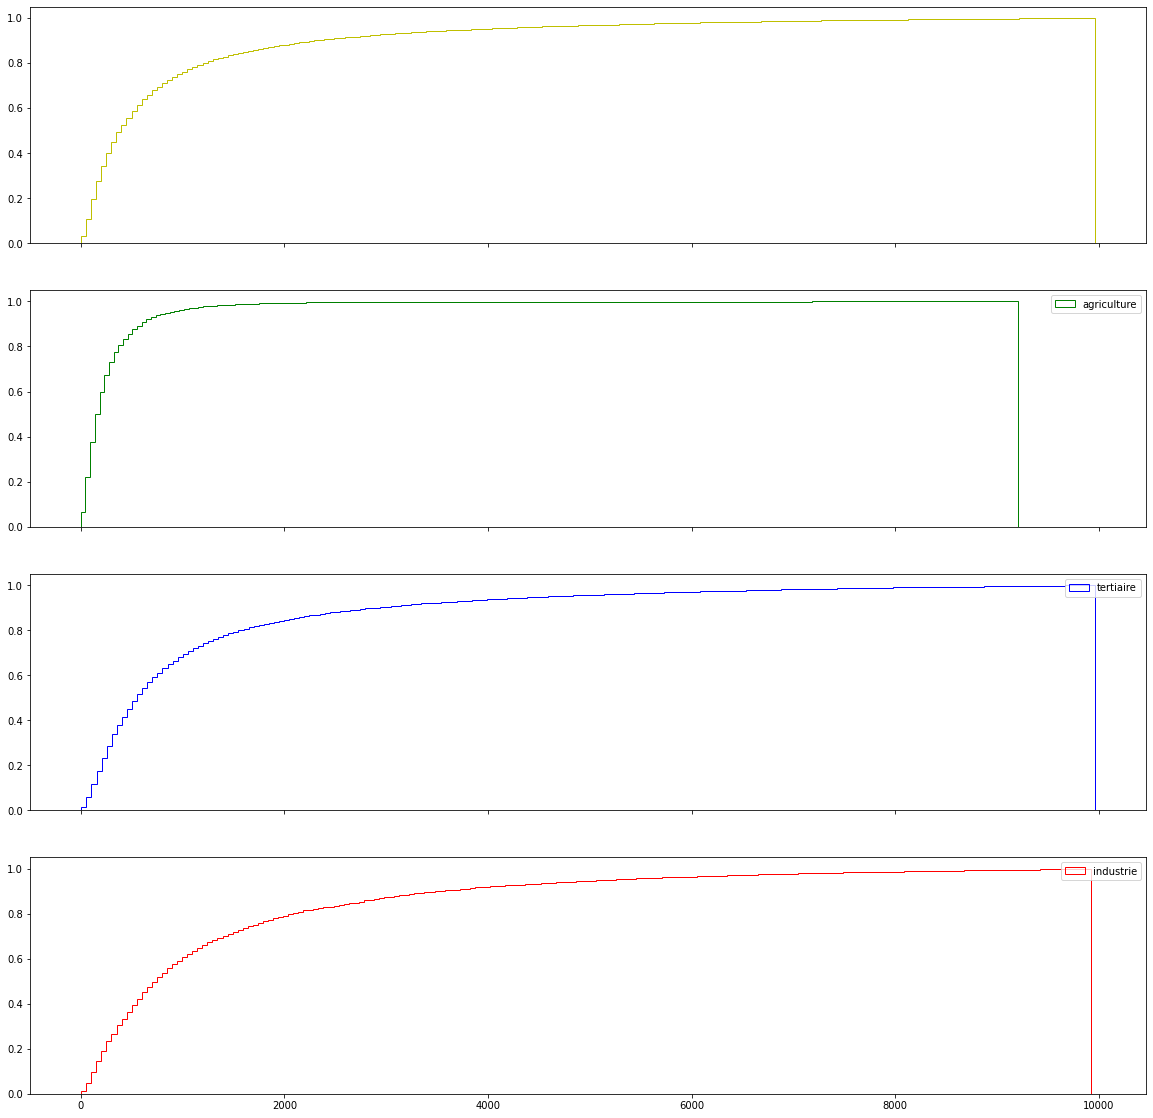

In [120]:
fig, axes = plt.subplots(4, figsize=(20, 20), sharex=True)

# axes[0].hist(
#     df['pop_total'][df['pop_total'] < limit_population],
#     bins=bins,
#     label='total',
#     color='y',
#     alpha=.3,
#     density=True
# )

axes[0].hist(
    df['pop_total'][df['pop_total'] < limit_population],
    bins=bins,
    label='total' + ' cumulatif',
    color='y',
    density=True,
    histtype='step',
    cumulative=True,
)


for i, val in enumerate(secteurs): 
    axes[i + 1].hist(
        df[df['max_conso'] == val]['pop_total'][df['pop_total'] < limit_population],
        bins=bins,
        label=val,
        color=colors[val],
#         alpha=.3,
        density=True,
        histtype='step',
        cumulative=True
    )
    
    axes[i+1].legend()
plt.show()

## Autre approche pour déterminer les villes rurales

- on calcule la consommation unitaire des entreprises dans les différents secteurs
- on détermine ensuite dans quelles villes cette consommation est dans le dernier quartile ? 

In [123]:
consommation_agricole_par_entreprises = df['consommation_libelle_grand_secteur_agriculture'] / (df['nb_ent'] + 1)

consommation_agricole_par_entreprises.describe()

count    31780.000000
mean        14.659069
std         69.092962
min          0.000000
25%          0.000000
50%          2.415994
75%         12.832371
max       7854.432997
dtype: float64

In [124]:
df[consommation_agricole_par_entreprises > 12.832371]['max_conso'].value_counts()

agriculture    5097
tertiaire      1903
industrie       945
Name: max_conso, dtype: int64

In [125]:
# pour comparaison
df['max_conso'].value_counts()

tertiaire      17413
agriculture     9323
industrie       5044
Name: max_conso, dtype: int64

In [129]:
df[df['max_conso'] == 'agriculture'].sort_values('pop_total').tail(20)

numero_departement               nom_commune  code_region  \
6839                   22              Ploubazlanec           53   
9461                   29                   Elliant           53   
29704                  85               Commequiers           52   
23619                  66           Palau-del-Vidre           91   
9429                   29               Bourg-Blanc           53   
29829                  85  Saint-André-Treize-Voies           52   
23499                  66                    Alénya           91   
9510                   29                   Landéda           53   
9543                   29                  Loperhet           53   
9558                   29                   Pleyben           53   
3977                   13                  Eyragues           93   
15891                  49              Vern-d'Anjou           52   
11891                  35                   Melesse           53   
29646                  84                  Sarrians           93   
11509                  34                    Gignac           91   
3976                   13                 Eyguières           93   
14967                  45        Saint-Denis-en-Val           24   
14717                  44                   Varades           52   
28979                  81                   Carmaux           73   
1597                    5                  Briançon           93   

                       nom_region  codgeo   latitude  longitude  \
6839                     Bretagne   22210  48.800000  -3.033333   
9461                     Bretagne   29049  48.000000  -3.883333   
29704            Pays de la Loire   85071  46.766667  -1.850000   
23619        Languedoc-Roussillon   66133  42.566667   2.966667   
9429                     Bretagne   29015  48.500000  -4.500000   
29829            Pays de la Loire   85197  46.933333  -1.416667   
23499        Languedoc-Roussillon   66002  42.633333   2.983333   
9510                     Bretagne   29101  48.583333  -4.566667   
9543                     Bretagne   29140  48.383333  -4.300000   
9558                     Bretagne   29162  48.233333  -3.966667   
3977   Provence-Alpes-Côte d'Azur   13036  43.833333   4.833333   
15891            Pays de la Loire   49367  47.600000  -0.833333   
11891                    Bretagne   35173  48.216667  -1.700000   
29646  Provence-Alpes-Côte d'Azur   84122  44.083333   4.966667   
11509        Languedoc-Roussillon   34114  43.650000   3.550000   
3976   Provence-Alpes-Côte d'Azur   13035  43.700000   5.033333   
14967                      Centre   45274  47.883333   1.950000   
14717            Pays de la Loire   44213  47.383333  -1.033333   
28979               Midi-Pyrénées   81060  44.050000   2.150000   
1597   Provence-Alpes-Côte d'Azur    5023  44.900000   6.650000   

                       libgeo_x  nb_ent  nb_ent_0  ...  \
6839               Ploubazlanec   155.0     119.0  ...   
9461                    Elliant   141.0      93.0  ...   
29704               Commequiers   147.0     104.0  ...   
23619           Palau-del-Vidre   173.0     137.0  ...   
9429                Bourg-Blanc   164.0      99.0  ...   
29829  Saint-André-Treize-Voies    36.0      29.0  ...   
23499                    Alénya   203.0     157.0  ...   
9510                    Landéda   161.0     112.0  ...   
9543                   Loperhet   164.0     116.0  ...   
9558                    Pleyben   212.0     133.0  ...   
3977                   Eyragues   338.0     238.0  ...   
15891              Vern-d'Anjou    90.0      59.0  ...   
11891                   Melesse   413.0     254.0  ...   
29646                  Sarrians   463.0     347.0  ...   
11509                    Gignac   414.0     304.0  ...   
3976                  Eyguières   438.0     317.0  ...   
14967        Saint-Denis-en-Val   325.0     229.0  ...   
14717                   Varades   225.0     138.0  ...   
28979                   Carmaux   562.0     364.0  ...   
1597      